# <center style='color:salmon'> t-Distributed Stochastic Neighbor Embedding (`t-SNE`) </center>

## 1. Import required libraries

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load sklearn's `wine` dataset 

In [2]:
wine = datasets.load_wine()
data = wine.data
labels = wine.target

In [3]:
data.shape # (n_samples, n_features)

(178, 13)

## 3. Create a dataframe

In [4]:
df = pd.DataFrame(data)
df['Labels'] = labels # add labels to the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.shape

(178, 14)

## 4. Separate features and labels

In [6]:
features = df.iloc[:, :-1]
classes = df.loc[:, 'Labels']

In [7]:
features.shape # same shape as 'data'

(178, 13)

## 5. Perform preprocessing

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

## 6. 2-dimensional `t-SNE`

In [9]:
tsne_2D = TSNE(n_components=2, random_state=0)
reduced_2D = tsne_2D.fit_transform(scaled)

In [10]:
reduced_2D.shape # from 13, the features have been reduced to 2

(178, 2)

In [11]:
reduced_2D[:6]

array([[ 6.7163334, 12.930066 ],
       [ 7.9122825,  6.62847  ],
       [ 5.9350514,  9.97577  ],
       [ 9.292871 , 12.383287 ],
       [ 2.3249207,  8.278097 ],
       [ 9.239322 , 11.401043 ]], dtype=float32)

In [12]:
np.unique(classes) # check unique wine types 

array([0, 1, 2])

In [13]:
comp1_2D = reduced_2D[:, 0]
comp2_2D = reduced_2D[:, 1]

In [14]:
color_dict = {0: 'r', 1: 'g', 2: 'b'}
label_dict = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'}
marker_dict = {0: 'd', 1: 's', 2: 'p'}
alpha_dict = {0: 1, 1: 1, 2: 1}

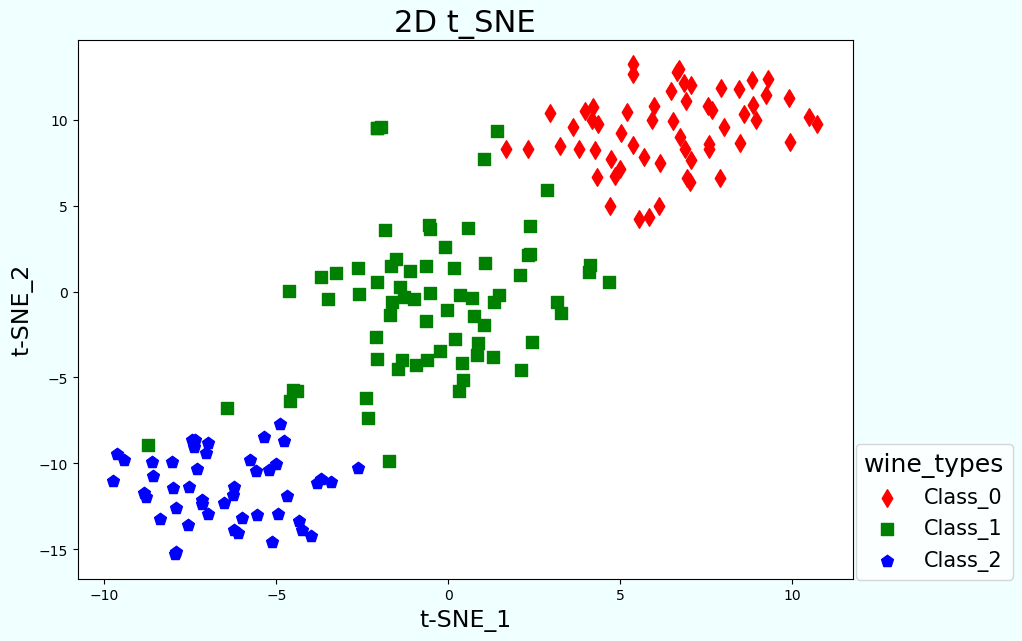

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('azure')

for i in np.unique(classes):
    j = np.where(classes == i)
    ax.scatter(comp1_2D[j], comp2_2D[j], c=color_dict[i], s=80, label=label_dict[i], marker=marker_dict[i], alpha=alpha_dict[i])

ax.set_xlabel('t-SNE_1', fontsize=17)
ax.set_ylabel('t-SNE_2', fontsize=17)
ax.set_title('2D t_SNE', fontsize=22)
ax.legend(title='wine_types', bbox_to_anchor=(1.22, 0.27), markerscale=1, fontsize=15, title_fontsize=18);

## 7. 3-dimensional `t-SNE`

In [16]:
tsne_3D = TSNE(n_components=3, random_state=0)
reduced_3D = tsne_3D.fit_transform(scaled)

In [17]:
reduced_3D.shape # from 13, the features have been reduced to 3

(178, 3)

In [18]:
reduced_3D[:6]

array([[47.738323 ,  6.2748656, 34.299835 ],
       [29.497461 , 28.026371 , -5.7268105],
       [27.615091 ,  6.903019 , 33.124264 ],
       [43.483967 , 29.253475 , 46.806217 ],
       [ 1.146486 , 11.52455  , 31.209097 ],
       [40.493343 , 37.77213  , 37.263    ]], dtype=float32)

In [19]:
comp1_3D = reduced_3D[:, 0]
comp2_3D = reduced_3D[:, 1]
comp3_3D = reduced_3D[:, 2]

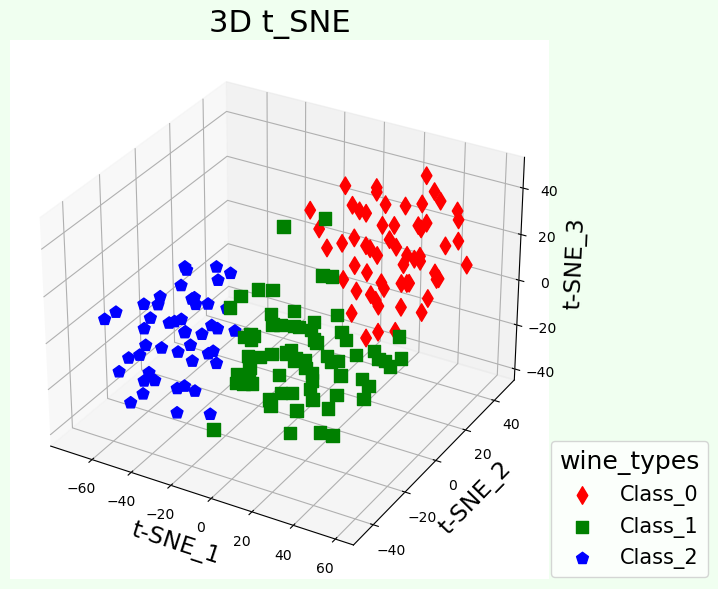

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('honeydew')

for i in np.unique(classes):
    j = np.where(classes == i)
    ax.scatter(comp1_3D[j], comp2_3D[j], comp3_3D[j], c=color_dict[i], s=80, label=label_dict[i], marker=marker_dict[i],
               alpha=alpha_dict[i])

ax.set_xlabel('t-SNE_1', fontsize=17)
ax.set_ylabel('t-SNE_2', fontsize=17)
ax.set_zlabel('t-SNE_3', fontsize=17)
ax.set_title('3D t_SNE', fontsize=22)
ax.legend(title='wine_types', bbox_to_anchor=(1.315, 0.275), markerscale=1, fontsize=15, title_fontsize=18);